In [2]:
import pandas as pd

df = pd.read_csv('./cleaned_data/c_train.csv')

df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,log_glucose,gender_Female,gender_Male,gender_Other,...,hypertension heart_disease,hypertension avg_glucose_level,hypertension bmi,heart_disease^2,heart_disease avg_glucose_level,heart_disease bmi,avg_glucose_level^2,avg_glucose_level bmi,bmi^2,stroke
0,0,0.438477,0.0,0.0,0.049626,0.250859,4.187683,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4338.8569,2121.014,1036.84,0
1,1,0.548340,0.0,0.0,0.062506,0.171821,4.229167,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4714.1956,1737.098,640.09,0
2,2,0.707031,0.0,0.0,0.534623,0.233677,5.141254,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,29217.0649,5247.551,942.49,0
3,3,0.743652,0.0,0.0,0.068138,0.192440,4.246779,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4883.2144,1893.748,734.41,0
4,4,0.951172,0.0,0.0,0.225002,0.232532,4.643044,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,10786.8996,3178.116,936.36,0


In [18]:
X = df[['age', 'hypertension']]
y = df['stroke']

# MinMax normalize Age and AnnualSalary in X
X_normalized = (X - X.min()) / (X.max() - X.min())

# Check the first few rows of the normalized data
X_normalized.head()

,age,hypertension
0,0.438477,0.0
1,0.548340,0.0
2,0.707031,0.0
3,0.743652,0.0
4,0.951172,0.0


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Check the dimensions of the training and testing data
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((3269, 2), (818, 2), (3269,), (818,))

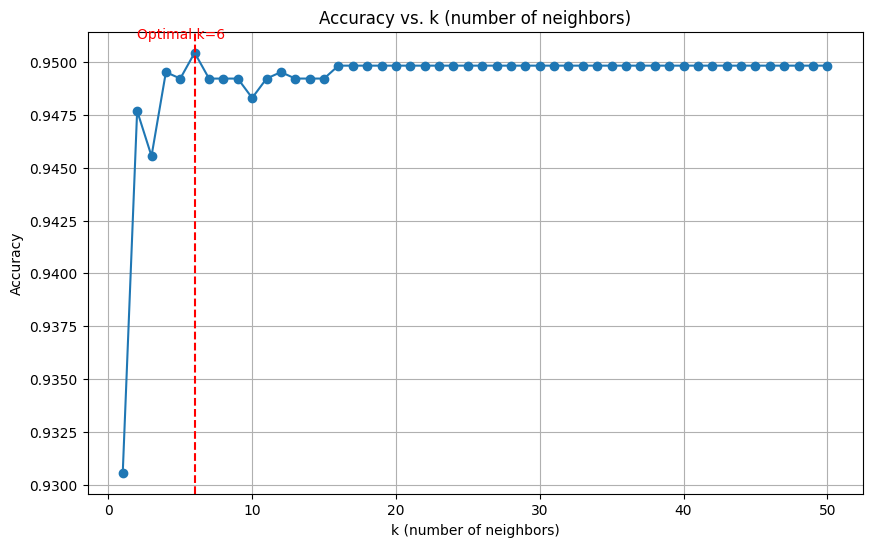

6

In [20]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# range of k values to try
k_values = np.arange(1, 51)

# list to store cross-validation scores
cv_scores = []

# Find the best k using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# determine the best k
best_k = k_values[np.argmax(cv_scores)]

# plotting the cross-validation scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k (number of neighbors)')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.annotate(f'Optimal k={best_k}', (best_k, max(cv_scores)), textcoords="offset points", xytext=(-10,10), ha='center', color='r')

plt.grid(True)
plt.show()

best_k


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# init and fit the model with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# predict the outcomes for the testing set
y_pred = knn_optimal.predict(X_test)

# generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# classification report for detailed metrics
class_report = classification_report(y_test, y_pred)

conf_matrix


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[783,   0],
       [ 35,   0]], dtype=int64)

In [22]:
accuracy

0.9572127139364304

In [23]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       783\n           1       0.00      0.00      0.00        35\n\n    accuracy                           0.96       818\n   macro avg       0.48      0.50      0.49       818\nweighted avg       0.92      0.96      0.94       818\n'